# Visualisation des pluies journalières d'un pixel du dataset SM2RAIN (grille mondiale de 12.5 km)
https://zenodo.org/record/3635932#.XoWskagzZhG   

Les fichiers annuels SM2RAIN consécutifs doivent se trouver dans le même dossier (1 fichier par année de  2007 à 2019)
- renommer si besoin les fichiers quand le numéro de version est variable selon les années, ce qui n'est pas traité dans le code
- copier-coller le nom du dossier de travail dans la variable "path" du code
- saisir l'année de début et de fin dans les variables year_start et year_end
- changer les coordonnées géographiques du pixel à extraire dans la variable "stat" du code (en longitude et latitude)
- Lancer le script et patienter jusqu'à la fin du traitement qui prend une petite dizaine de secondes

NB: le code original est légèrement modifié (LDU) pour...
- ... fonctionner avec python 3.x au lieu de python 2.7
- ... paramétrer les années de début et de fin
- ... permettre un simple copier-coller du nom de dossier au format Windows (sinon anti slash interprété comme un caracètre de contrôle)
- ....extraires les données avec les dates dans un fichier texte, pour les pluies journalières mais aussi pour les cumuls mensuels
- ... et améliorer les graphiques en allongeant l'axe des temps (et (en option pour le fun) en améliorerant l'esthétique au moyen de la librarie "seaborn")

(365L,) (0L,)
(366L,) (365L,)
(365L,) (731L,)
(365L,) (1096L,)
(365L,) (1461L,)
(366L,) (1826L,)
(365L,) (2192L,)
(365L,) (2557L,)
(365L,) (2922L,)
(366L,) (3287L,)
(365L,) (3653L,)
(365L,) (4018L,)
(365L,) (4383L,)


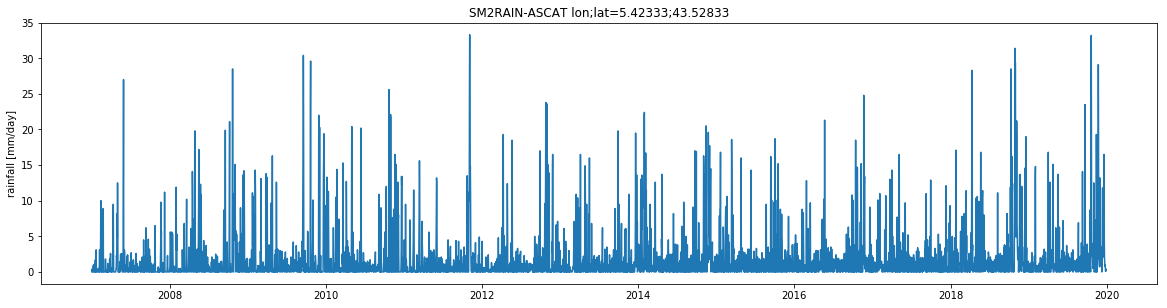

In [2]:
"""
Created on April 2020
Original code from https://zenodo.org/record/3635932#.XoWskagzZhG
Improved by @author: Loïc Duffar
"""
#%matplotlib notebook # ajoute en principe aux graphique un menu d'interactivité, mais ce n'est pas systématiquement le cas !
%matplotlib inline
import os
import netCDF4
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
#import seaborn as sns
import matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#sns.set()
matplotlib.rcParams["figure.figsize"] =[20., 4.8]
path=r"X:\1-COMMUN\DIS\Documentation\Hydrologie\Documentation externe\Climat Monde\Pluies SM2RAIN\12.5km 2007-2019".replace("\\","/")
nc_f=os.path.join(path, 'SM2RAIN_ASCAT_0125_2007_v1.1.nc')
nc_fid = netCDF4.Dataset(nc_f, 'r')
year_start= 2007
year_end= 2019
# -------------------Coordinates of the station you want to extract
stat=[5.42333, 43.52833]
lat_ = nc_fid.variables['Latitude'][:]
lon_ = nc_fid.variables['Longitude'][:]
tree=spatial.KDTree(list(zip(lon_.ravel(),lat_.ravel())))
[d,ID]=tree.query(stat)
# -------------------Extraction of SM2RAIN-ASCAT rainfall from 2007 to 2019
datahub=[]
for ii in np.arange(year_start, year_end+1):
    nc_f=os.path.join(path,'SM2RAIN_ASCAT_0125_'+str(ii)+'_v1.1'+'.nc')
    nc_fid = netCDF4.Dataset(nc_f, 'r')
    Rain=nc_fid.variables['Rainfall'][ID]
    # np.concatenate does not preserve masking of MaskedArray inputs, here np.ma.concatenate is used
    datahub=np.ma.concatenate((datahub,Rain), axis=0)

DD = np.arange(datetime(year_start,1,1), datetime(year_end+1,1,1), timedelta(days=1)).astype(datetime)
plt.plot(DD,datahub)
plt.ylabel('rainfall [mm/day]')
plt.title('SM2RAIN-ASCAT lon;lat='+str(stat[0])+';'+str(stat[1]))
plt.show()

# Calcul et visualisation des pluies mensuelles

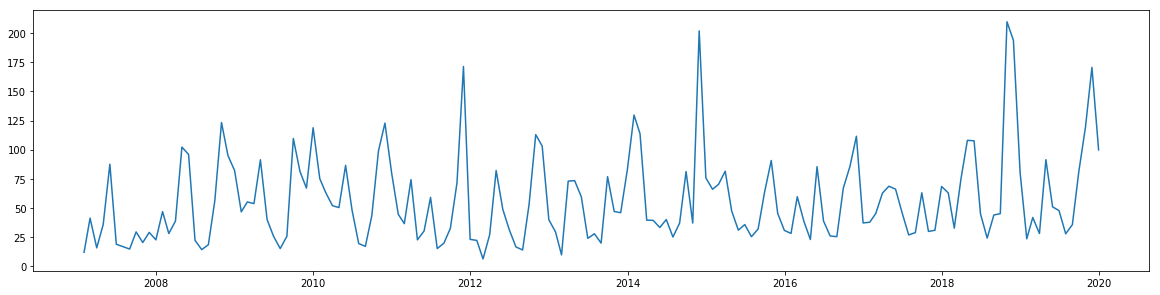

In [4]:
import pandas as pd
# print type(DD), datahub
qj=pd.Series(data=datahub, index=DD)
qm=qj.resample('M').sum()
plt.plot(qm)

## Extraction des pluies journalières et mensuelles dans des fichiers textes

In [4]:
qj.to_csv(os.path.join(path, "PJ_Aix SM2RAIN.txt"), index=True, header=False, sep=";")
qm.to_csv(os.path.join(path, "PM_Aix SM2RAIN.txt"), index=True, header=False, sep=";")